<a href="https://colab.research.google.com/github/1234-ad/1234-ad/blob/main/Market_segmentation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Fast Food**


# Step 4: Exploring Data

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

In [ ]:
# Loading the data set
data = pd.read_csv("mcdonalds.csv")

Inspecting basic features such as the variable names, the sample size, and the first three rows of the data:

In [ ]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
data.shape

(1453, 15)

In [ ]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [ ]:
# Extract relevant columns
MD_x = data.iloc[:, 0:11]

# Convert "Yes" to 1, "No" to 0
MD_x = (MD_x == "Yes").astype(int)
# Calculating and rounding the column means
columnMeans = np.round(MD_x.mean(), 2)
columnHeadings = data.columns

# Printing the column headings with the corresponding rounded column means
result = dict(zip(columnHeadings, columnMeans))
print(result)

{'yummy': 0.55, 'convenient': 0.91, 'spicy': 0.09, 'fattening': 0.87, 'greasy': 0.53, 'fast': 0.9, 'cheap': 0.6, 'tasty': 0.64, 'expensive': 0.36, 'healthy': 0.2, 'disgusting': 0.24}


**Performing PCA**

In [ ]:
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display PCA summary and components
print(pd.DataFrame({'Standard deviation': np.sqrt(MD_pca.explained_variance_),'Proportion of variance': MD_pca.explained_variance_ratio_, 'Cumulative Proportion:': np.cumsum(MD_pca.explained_variance_ratio_)}))

    Standard deviation  Proportion of variance  Cumulative Proportion:
0             0.757050                0.299447                0.299447
1             0.607456                0.192797                0.492244
2             0.504619                0.133045                0.625290
3             0.398799                0.083096                0.708386
4             0.337405                0.059481                0.767866
5             0.310275                0.050300                0.818166
6             0.289697                0.043849                0.862015
7             0.275122                0.039548                0.901563
8             0.265251                0.036761                0.938323
9             0.248842                0.032353                0.970677
10            0.236903                0.029323                1.000000


In [ ]:
print("Standard deviations:")
print(np.round(MD_pca.explained_variance_, 1))
print("\nProportion of Variance:")
print(np.round(MD_pca.explained_variance_ratio_, 1))
print("\nCumulative Proportion:")
print(np.round(np.cumsum(MD_pca.explained_variance_ratio_), 1))

Standard deviations:
[0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Proportion of Variance:
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

Cumulative Proportion:
[0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]


In [ ]:
# Show the loadings indicating how the original variables are combined to form principal components.
loadings = pd.DataFrame(MD_pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(MD_pca.n_components_)],
                        index=MD_x.columns)
print(loadings)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933 -0.363790  0.304444  0.055162  0.307535 -0.170738   
convenient  0.155332 -0.016414  0.062515 -0.142425 -0.277608  0.347830   
spicy       0.006356 -0.018809  0.037019  0.197619 -0.070620  0.355087   
fattening  -0.116232  0.034094  0.322359 -0.354139  0.073405  0.406515   
greasy     -0.304443  0.063839  0.802373  0.253960 -0.361399 -0.209347   
fast        0.108493  0.086972  0.064642 -0.097363 -0.107930  0.594632   
cheap       0.337186  0.610633  0.149310  0.118958  0.128973  0.103241   
tasty       0.471514 -0.307318  0.287265 -0.002547  0.210899  0.076914   
expensive  -0.329042 -0.601286 -0.024397  0.067816  0.003125  0.261342   
healthy     0.213711 -0.076593 -0.192051  0.763488 -0.287846  0.178226   
disgusting -0.374753  0.139656  0.088571  0.369539  0.729209  0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519 -0.013041 -0.572403  0.1102

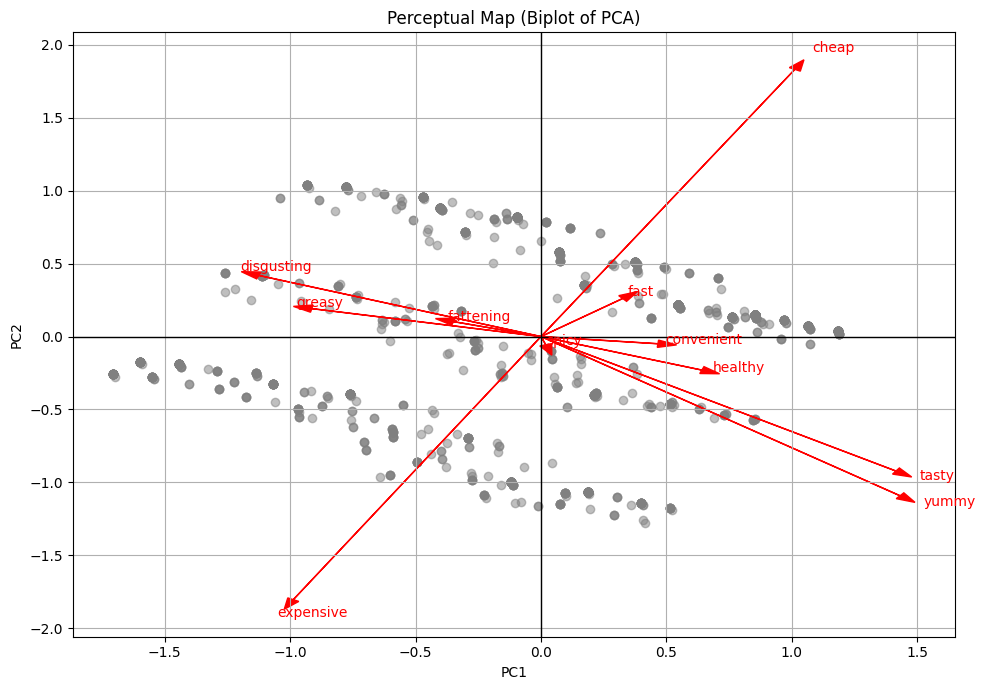

In [ ]:
# Project consumers into the first two principal components
pca = PCA(n_components=2)
MD_x_pca = pca.fit_transform(MD_x)

# Create a perceptual map (biplot)
plt.figure(figsize=(10, 7))

# Plot projected consumers (in grey)
plt.scatter(MD_x_pca[:, 0], MD_x_pca[:, 1], color='grey', alpha=0.5)

# Plot arrows for original features (loadings)
loadings = pca.components_.T
for i, feature in enumerate(MD_x.columns):
    plt.arrow(0, 0,                     # start at origin
              loadings[i, 0]*3,         # scale arrows to make them visible
              loadings[i, 1]*3,
              color='red', head_width=0.05)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, feature, color='red')

# Aesthetics
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map (Biplot of PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 5: Extracting Segments

**Using K-means**

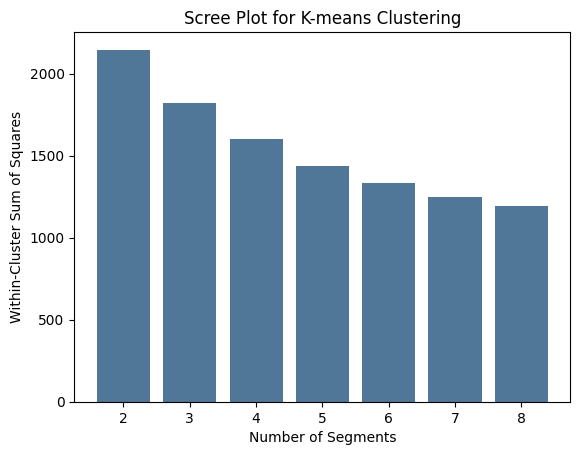

In [ ]:
wcss = []  # within-cluster sum of squares (inertia)

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)

# Plot the scree plot
plt.bar(range(2,9), wcss, color='#063e6b', alpha=0.7)
plt.xlabel("Number of Segments")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Scree Plot for K-means Clustering")
plt.show()


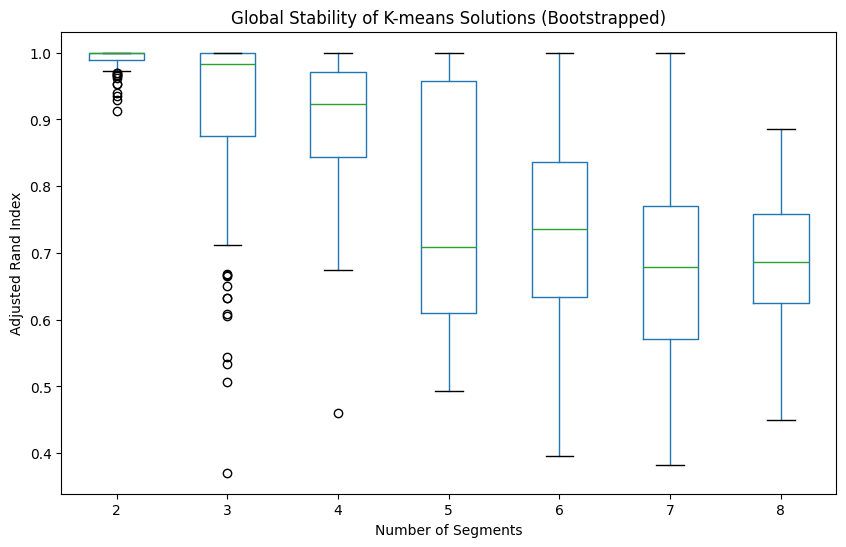

In [ ]:
np.random.seed(12)
nboot = 100
nrep = 10
k_range = range(2, 9)

stability_results = {k: [] for k in k_range}

for k in k_range:
    #print(f"Processing k={k}...")
    for _ in range(nboot):
        # Bootstrap sample
        X_boot = resample(MD_x, replace=True, n_samples=len(MD_x))

        # Two different random initializations of k-means
        km1 = KMeans(n_clusters=k, n_init=nrep, random_state=None).fit(X_boot)
        km2 = KMeans(n_clusters=k, n_init=nrep, random_state=None).fit(X_boot)

        # ARI between the two clustering solutions on same data
        ari = adjusted_rand_score(km1.labels_, km2.labels_)
        stability_results[k].append(ari)

# Convert to DataFrame
stability_df = pd.DataFrame({
    f"{k}": pd.Series(ari_list)
    for k, ari_list in stability_results.items()
})

# Plot (like the book)
plt.figure(figsize=(10, 6))
stability_df.boxplot()
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability of K-means Solutions (Bootstrapped)")
plt.grid(False)
plt.show()


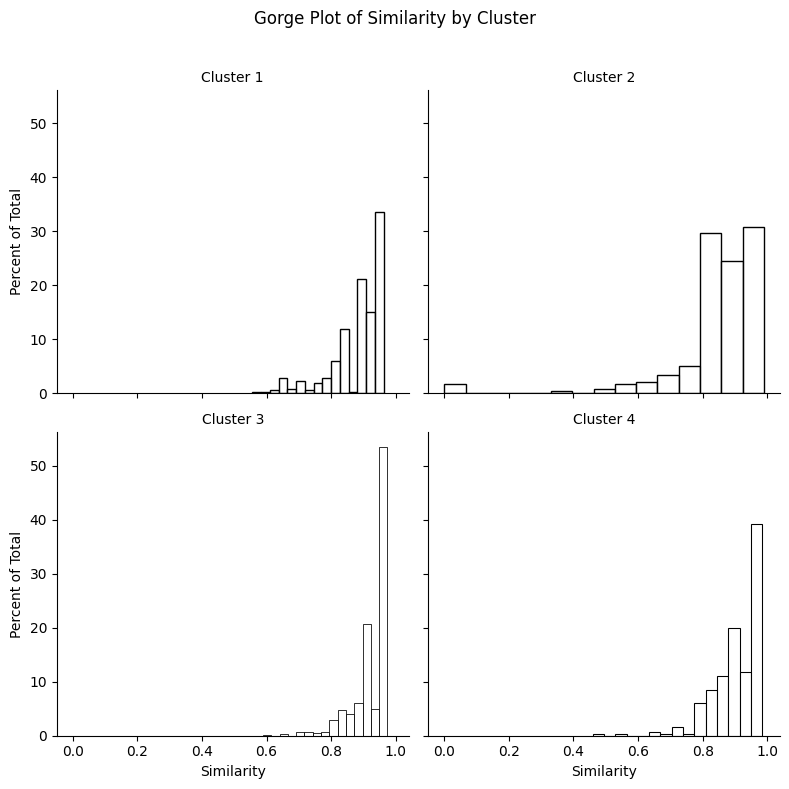

In [ ]:
# Sample similarity: cosine similarity to cluster centroid
from sklearn.metrics.pairwise import cosine_similarity

# KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Add cluster labels and similarity variable to a DataFrame
df = MD_x.copy()
df['Cluster'] = clusters+1
df['Cluster'] = df['Cluster'].astype(str)  # for consistent labeling
df['Cluster'] = 'Cluster ' + df['Cluster']
similarities = cosine_similarity(MD_x, kmeans.cluster_centers_[clusters])
df['similarity'] = [s[i] for i, s in enumerate(similarities)]


# Create gorge-style plot using FacetGrid
cluster_order = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Gorge-style plot with 2x2 layout: Cluster 1–4 arranged manually
g = sns.FacetGrid(df, col="Cluster", col_order=cluster_order,
                  col_wrap=2, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "similarity", stat="percent", bins=15, color="white", edgecolor="black")

# Aesthetics
g.set_axis_labels("Similarity", "Percent of Total")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Gorge Plot of Similarity by Cluster")

plt.show()


In [ ]:
import plotly.graph_objects as go

# Assume MD_x is your original (unstandardized) DataFrame
X = MD_x.values  # convert to numpy array if it's a DataFrame

cluster_range = range(2, 9)
clusterings = {}

# Run KMeans clustering for k = 2 to 8
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=12)
    labels = kmeans.fit_predict(X)
    clusterings[k] = labels

# Build links for Sankey diagram
sources = []
targets = []
values = []
labels = []
label_index_map = {}
label_counter = 0

# For assigning unique IDs to nodes (segment numbers at each k)
def get_node_id(k, seg):
    global label_counter
    key = f'k={k} seg={seg}'
    if key not in label_index_map:
        label_index_map[key] = label_counter
        labels.append(f'{seg}')
        label_counter += 1
    return label_index_map[key]

# Track flows between consecutive k
for k1, k2 in zip(cluster_range[:-1], cluster_range[1:]):
    segs1 = clusterings[k1]
    segs2 = clusterings[k2]
    for seg1 in np.unique(segs1):
        for seg2 in np.unique(segs2):
            mask = (segs1 == seg1) & (segs2 == seg2)
            flow = np.sum(mask)
            if flow > 0:
                source = get_node_id(k1, seg1 + 1)
                target = get_node_id(k2, seg2 + 1)
                sources.append(source)
                targets.append(target)
                values.append(flow)

# Create Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(0,100,0,0.4)"
    ))])

fig.update_layout(title_text="SLSA Plot (Segment Level Stability Across Solutions)", font_size=12)
fig.show()


**Using Mixtures of Distributions**

In [ ]:
columns = ["iter", "converged", "k", "k0", "logLik", "AIC", "BIC"]
results = pd.DataFrame(columns=columns)
X = np.array(MD_x)

# Perform Latent Class Analysis (LCA) using Gaussian Mixture Model
for k in range(2, 9):
    lca_model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    lca_model.fit(X)

    # Get log-likelihood and other metrics
    log_likelihood = lca_model.score(X)
    aic = lca_model.aic(X)
    bic = lca_model.bic(X)

    # Append the results to the DataFrame
    results = pd.concat([results, pd.DataFrame([{"iter": lca_model.n_iter_,"converged": True,"k": k,"k0": k,"logLik": log_likelihood,
        "AIC": aic,"BIC": bic }])], ignore_index=True)
print(results)

  iter converged  k k0     logLik           AIC           BIC
0    7      True  2  2   7.672279 -21985.641850 -21167.027072
1   12      True  3  3   9.722264 -27786.899425 -26556.336565
2   11      True  4  4  12.053367 -34405.083804 -32762.572863
3   18      True  5  5  15.485844 -44223.863382 -42169.404358
4    8      True  6  6  19.629761 -56110.084021 -53643.676917
5   18      True  7  7  20.407761 -58214.952914 -55336.597727
6   12      True  8  8  18.385967 -52183.620368 -48893.317099


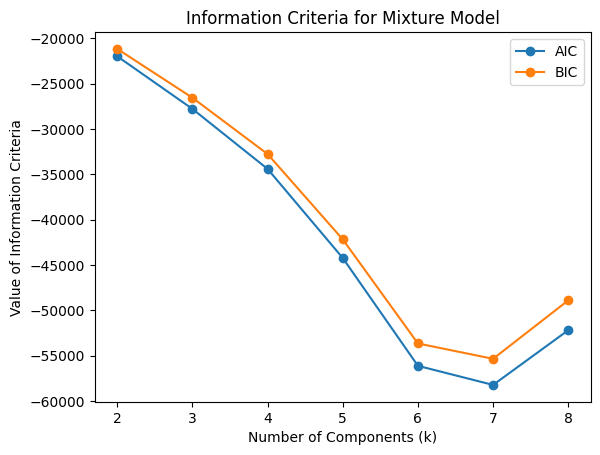

mixture    0    1    2    3
kmeans                     
0         31   51  268   14
1          4  214    0   22
2        143    0  362   28
3          0    3    0  313


In [ ]:
# Latent Class Analysis using Gaussian Mixture Model
aicValues = []
bicValues = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(MD_x)
    aicValues.append(model.aic(MD_x))
    bicValues.append(model.bic(MD_x))

# Plot information criteria
plt.plot(range(2, 9), aicValues, label='AIC', marker='o')
plt.plot(range(2, 9), bicValues, label='BIC', marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.title('Information Criteria for Mixture Model')
plt.show()

# Select the model for k=4
selected_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
selected_model.fit(MD_x)

# Cross-tabulation of clusters from k-means and the mixture model
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x)

cluster_comparison = pd.crosstab(index=kmeans_labels, columns=selected_model.predict(MD_x), rownames=['kmeans'], colnames=['mixture'])
print(cluster_comparison)

**Using Mixtures of Regression Models**

In [ ]:
mcdonalds=data.copy()
# Show number of rows for each level in the original 'Like' column
like_counts = mcdonalds["Like"].value_counts().sort_index()

print(like_counts)


Like
+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: count, dtype: int64


In [ ]:

like_levels = [
    "I love it!+5", "+4", "+3", "+2", "+1", "0", "-1", "-2", "-3", "-4", "I hate it!-5"
]

# Convert to categorical with defined order
mcdonalds["Like"] = pd.Categorical(mcdonalds["Like"], categories=like_levels, ordered=True)

# Convert to numeric codes (0–10), then use 6 - code to get -5 to +5 scale
mcdonalds["Like.n"] =5- mcdonalds["Like"].cat.codes

# Check value distribution
print(mcdonalds["Like.n"].value_counts().sort_index())



Like.n
-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: count, dtype: int64


In [ ]:
# Define dependent and independent variables
# Replace 'Yes' with 1 and 'No' with 0 in the whole DataFrame
mcdonalds = mcdonalds.replace({'Yes': 1, 'No': 0})
y_var = 'Like.n'
x_vars = mcdonalds.columns[:11].tolist()  # assuming first 11 are predictors

# Extract features and response
X = mcdonalds[x_vars].values
y = mcdonalds[y_var].values


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Combine X and y for joint modeling
data = np.column_stack((X, y.reshape(-1, 1)))

# Fit Gaussian Mixture Model with 2 components and full covariance
gmm = GaussianMixture(n_components=2, n_init=10, covariance_type='full', random_state=1234)
gmm.fit(data)

# Predict component memberships
clusters = gmm.predict(data)

# Show cluster sizes
unique, counts = np.unique(clusters, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)


Cluster sizes: {np.int64(0): np.int64(1060), np.int64(1): np.int64(393)}


In [ ]:
import statsmodels.api as sm

# Cluster labels from mixture model (as in earlier code)
cluster_labels = clusters  # output from GaussianMixture.predict(data)

# Prepare design matrix
X = mcdonalds[x_vars]
y = mcdonalds['Like.n']

results = {}

for comp in [0, 1]:
    mask = cluster_labels == comp
    X_cluster = X[mask]
    y_cluster = y[mask]

    # Add intercept manually for statsmodels
    X_with_intercept = sm.add_constant(X_cluster)
    model = sm.OLS(y_cluster, X_with_intercept).fit()
    results[f'Comp. {comp + 1}'] = model


In [ ]:
# Collect all stats in a single DataFrame
summary_df = pd.DataFrame()

for comp_name, model in results.items():
    coefs = model.params
    std_err = model.bse
    p_vals = model.pvalues
    conf_int = model.conf_int()

    comp_df = pd.DataFrame({
        'component': comp_name,
        'term': coefs.index,
        'estimate': coefs.values,
        'std_err': std_err.values,
        'p_value': p_vals.values,
        'ci_lower': conf_int[0].values,
        'ci_upper': conf_int[1].values,
        'significant': p_vals < 0.05 })
    comp_df['term'] = comp_df['term'].replace({'const': '(Intercept)'})
    summary_df = pd.concat([summary_df, comp_df], ignore_index=True)


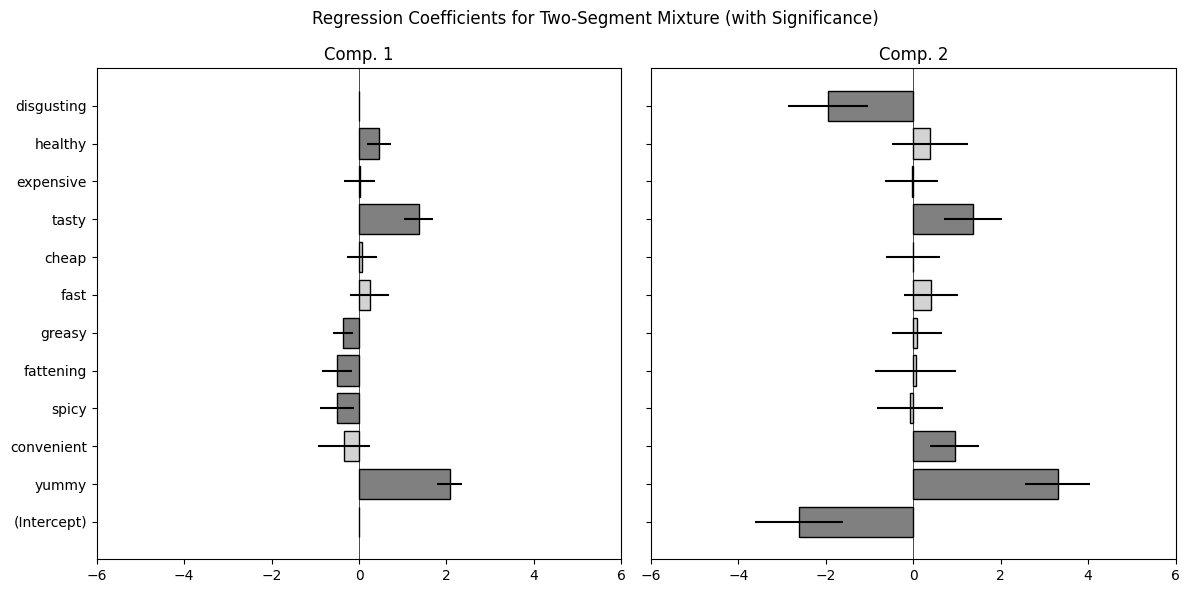

In [ ]:
# Set up the figure
# Define term order explicitly: include intercept + x_vars
terms = ['(Intercept)'] + x_vars  # Your 11 predictors

# Set up the figure
n_terms = len(terms)
fig, axes = plt.subplots(1, 2, figsize=(12, n_terms * 0.5), sharey=True)

for i, (comp_name, group) in enumerate(summary_df.groupby('component')):
    ax = axes[i]

    # Replace 'const' with '(Intercept)' (safe even if already done before)
    group['term'] = group['term'].replace({'const': '(Intercept)'})

    # Reindex to ensure all terms appear, even if missing in model
    group = group.set_index('term').reindex(terms)

    # Handle missing values (e.g., if term was not present)
    estimates = group['estimate'].fillna(0)
    errors = group['std_err'].fillna(0)
    significance = group['significant'].fillna(False)

    colors = ['gray' if sig else 'lightgray' for sig in significance]
    ax.barh(terms, estimates, xerr=1.96 * errors, color=colors, edgecolor='black')
    ax.axvline(0, color='black', lw=0.5)
    ax.set_title(comp_name)
    ax.set_xlim(-6, 6)

plt.suptitle("Regression Coefficients for Two-Segment Mixture (with Significance)")
plt.tight_layout()
plt.show()


# Step 6: Profiling Segments

In [ ]:
from scipy.spatial.distance import pdist

X = MD_x.iloc[:, :11]  # restrict to segmentation variables

# Transpose: cluster variables (not consumers)
dist_matrix = pdist(X.T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')

# Get the attribute order from the dendrogram
dendro = dendrogram(linkage_matrix, no_plot=True)
ordered_cols = [X.columns[i] for i in dendro['leaves']]


In [ ]:
# Cluster labels from 4-segment kmeans
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
segment_labels = kmeans.fit_predict(X)

# Add segment labels to the DataFrame
X_copy = X.copy()
X_copy['Segment'] = segment_labels

# Compute segment-wise means (profile)
profile_df = X_copy.groupby('Segment')[ordered_cols].mean()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cluster_series = pd.Series(segment_labels, name="Segment")

# Count frequency and percentage
cluster_counts = cluster_series.value_counts().sort_index()
total = len(cluster_series)
cluster_percentages = (cluster_counts / total * 100).round(2)

# Combine into a DataFrame for printing
cluster_summary = pd.DataFrame({
    "Cluster Size": cluster_counts,
    "Percentage (%)": cluster_percentages
})

# Shift index to match 1-based segment labels
cluster_summary.index = cluster_summary.index
cluster_summary.index.name = "Segment"

print("Cluster Sizes and Percentages (4-Segment KMeans):\n")
print(cluster_summary)

# Transpose for easier plotting: attributes on x-axis, segments as bars
profile_plot_df = profile_df.T  # shape: (attributes, segments)




Cluster Sizes and Percentages (4-Segment KMeans):

         Cluster Size  Percentage (%)
Segment                              
0                 364           25.05
1                 240           16.52
2                 533           36.68
3                 316           21.75


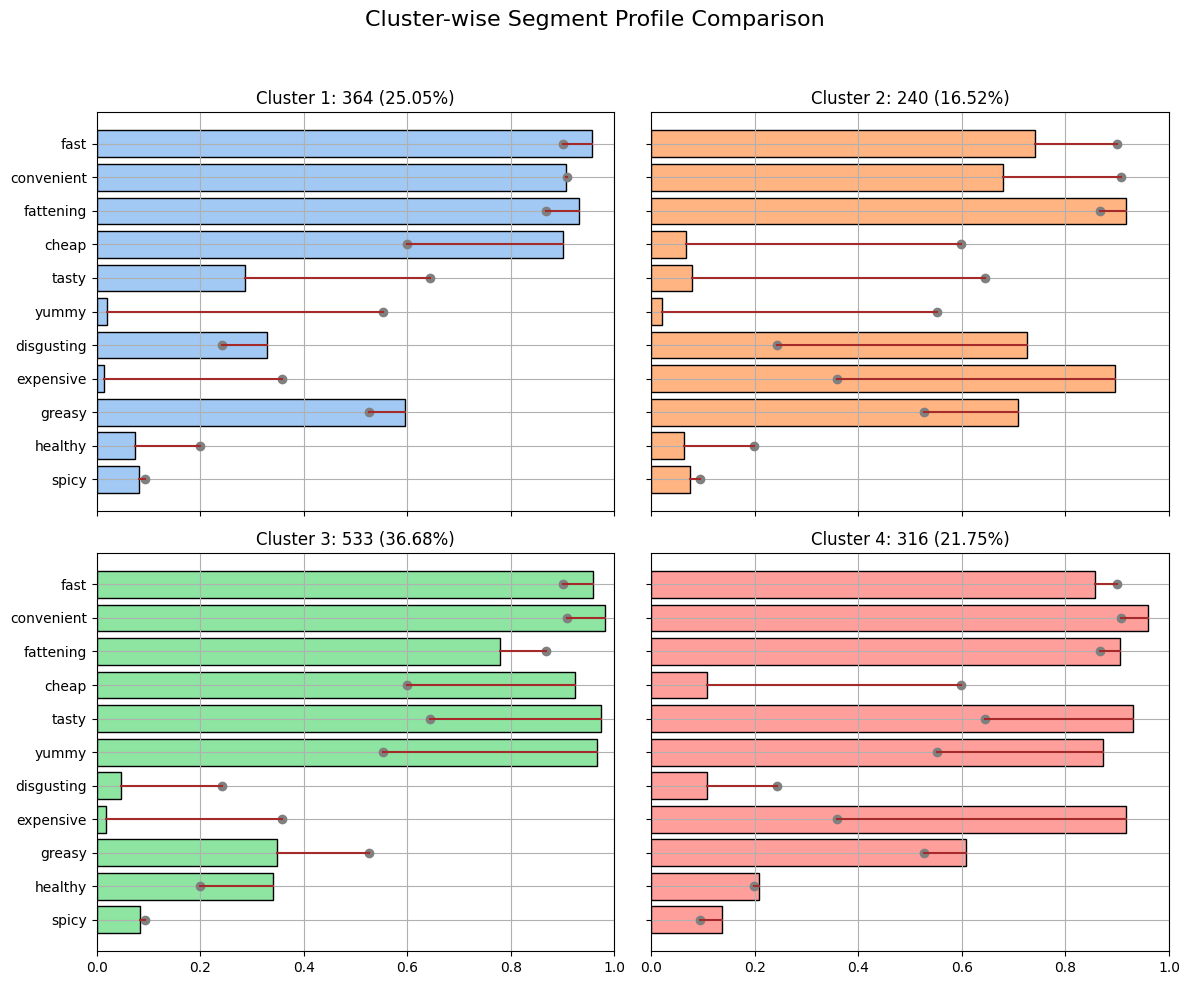

In [ ]:
overall_means = X.mean()
# 2. Set up 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
# Flatten axes for easier access
axes = axes.flatten()
# 3. Plot for each cluster
for i in range(4):
    ax = axes[i]
    cluster_mean = profile_df.iloc[i]
    segment_size = cluster_summary.loc[i, "Cluster Size"]
    segment_pct = cluster_summary.loc[i, "Percentage (%)"]

    # Barplot of cluster means
    bars = ax.barh(cluster_mean.index, cluster_mean.values, color=sns.color_palette("pastel")[i], edgecolor='black')

    # Overlay overall means as gray dots
    ax.plot(overall_means.loc[cluster_mean.index], cluster_mean.index, 'o', color='gray', label='Overall Mean')

    # Draw lines from overall mean to cluster bar (like vertical connectors)
    for j, attr in enumerate(cluster_mean.index):
        ax.plot([overall_means[attr], cluster_mean[attr]], [attr, attr], color='brown', lw=1.5)

    # Set title and labels
    ax.set_title(f"Cluster {i + 1}: {segment_size} ({segment_pct}%)")
    ax.set_xlim(0, 1)
    ax.invert_yaxis()  # match R plot style (top-down)
    ax.grid(True)

# Shared labels and layout
plt.suptitle("Cluster-wise Segment Profile Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
X = MD_x.iloc[:, :11]  # original 11 segmentation variables

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Loadings (to plot red arrows for variables)
loadings = pca.components_.T  # shape: (variables, components)


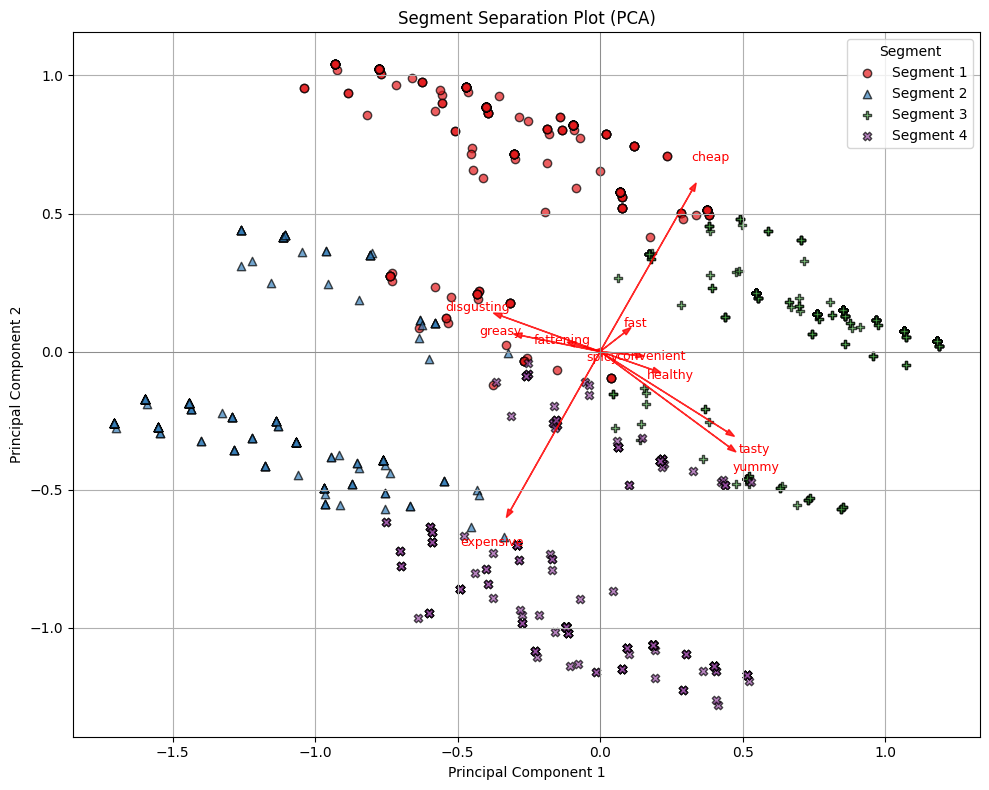

In [ ]:
# KMeans clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
clusters = kmeans.fit_predict(X)

# Define colors and markers for each segment
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3']
markers = ['o', '^', 'P', 'X']

# Start plotting
plt.figure(figsize=(10, 8))

for seg in range(4):
    idx = (clusters == seg)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1],
                color=colors[seg], marker=markers[seg],
                label=f"Segment {seg+1}", edgecolor='black', alpha=0.7)

# Label axes
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Segment Separation Plot (PCA)")

# Add PCA loading vectors (arrows for attributes)
for i, var in enumerate(X.columns):
    plt.arrow(0, 0,                   # start at origin
              loadings[i, 0],         # x-dir
              loadings[i, 1],         # y-dir
              color='red', alpha=0.8, head_width=0.02, length_includes_head=True)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var,
             color='red', fontsize=9, ha='center', va='center')

plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.legend(title='Segment', loc='best')
plt.tight_layout()
plt.show()


#  Step 7: Describing Segments

<Figure size 1200x600 with 0 Axes>

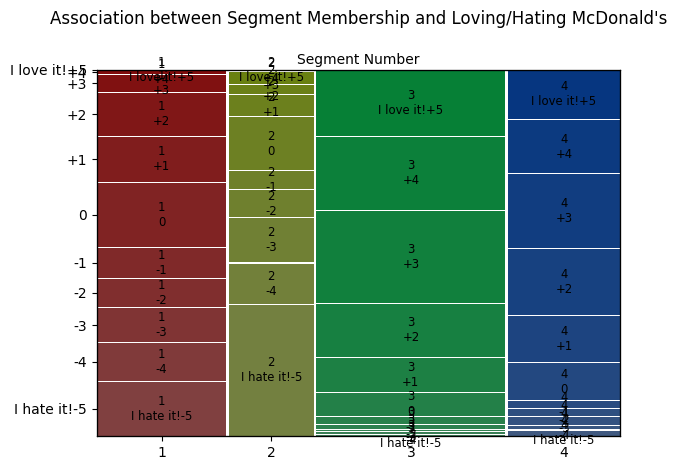

In [ ]:

like_order = ["I hate it!-5", "-4", "-3", "-2", "-1", "0", "+1", "+2", "+3", "+4", "I love it!+5"]

data = mcdonalds.copy()
data['Cluster Number'] = segment_labels + 1
data['Like'] = data['Like'].astype(str)

# Create crosstab in desired order
crosstab = pd.crosstab(data['Cluster Number'], data['Like'])
crosstab = crosstab[like_order]  # enforce column order

# Mosaic plot
plt.figure(figsize=(12, 6))
mosaic(crosstab.stack(), title="Association between Segment Membership and Loving/Hating McDonald's\n")
plt.xlabel("Segment Number")
plt.ylabel("Like Level")
plt.tight_layout()
plt.show()


In [ ]:
GenderCrossTab = pd.crosstab(data['Cluster Number'],data['Gender'])
GenderCrossTab


Gender,Female,Male
Cluster Number,,
1,213,151
2,101,139
3,324,209
4,150,166


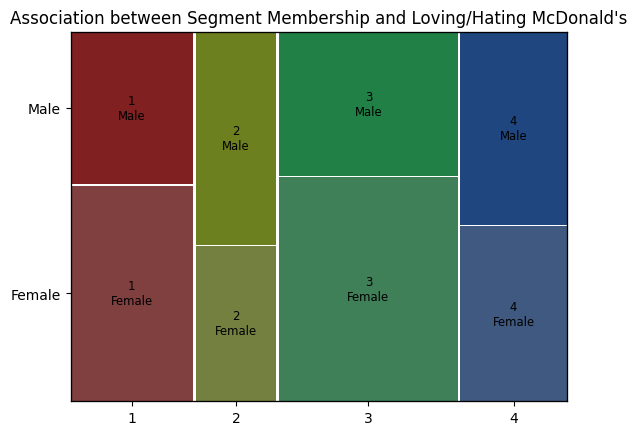

In [ ]:
mosaic(GenderCrossTab.stack(), title='Association between Segment Membership and Loving/Hating McDonald\'s')
plt.show()

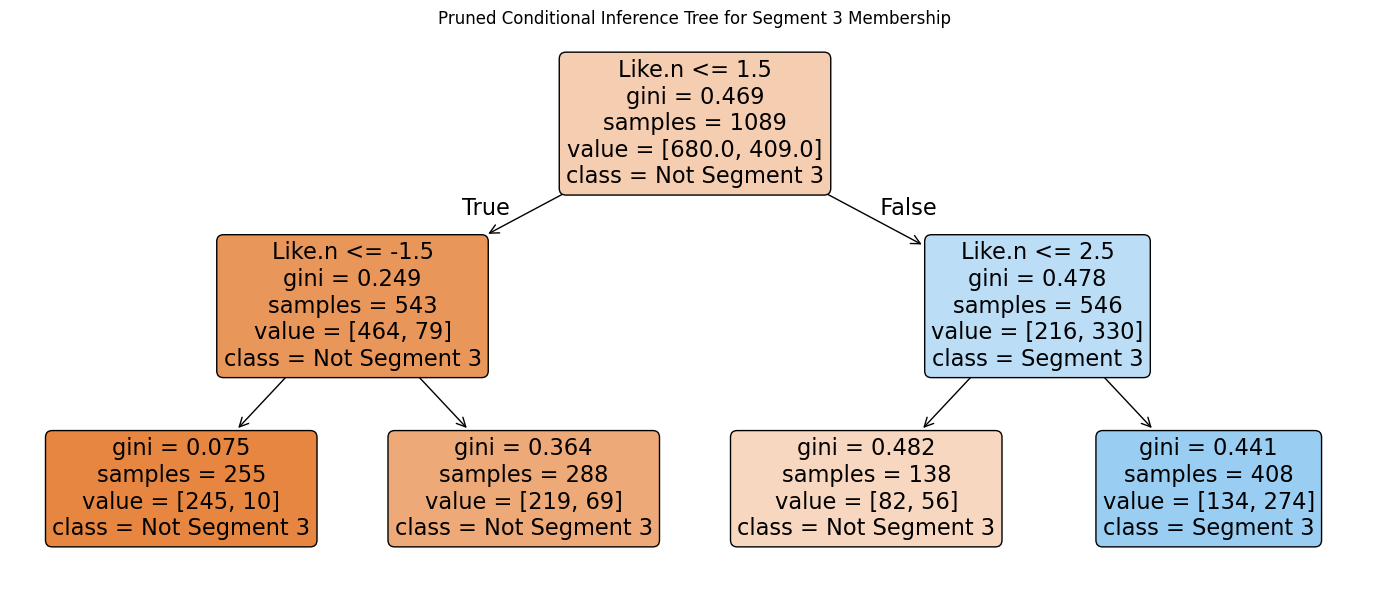

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Create binary target variable: is in Segment 3?
mcdonalds['Segment3'] = (segment_labels == 2).astype(int)

# Step 2: Prepare descriptor variables
desc_vars = ['Like.n', 'Age', 'VisitFrequency', 'Gender']

# One-hot encode categorical descriptors like 'Gender'
X = pd.get_dummies(mcdonalds[desc_vars], drop_first=True)
y = mcdonalds['Segment3']

# Step 3: Split data for pruning evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=10, random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

trees = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    trees.append(model)

pruned_tree = trees[3]  # Adjust index as needed based on complexity

plt.figure(figsize=(14, 6))
plot_tree(
    pruned_tree,
    feature_names=X.columns,
    class_names=["Not Segment 3", "Segment 3"],
    filled=True,
    rounded=True
)
plt.title("Pruned Conditional Inference Tree for Segment 3 Membership")
plt.tight_layout()
plt.show()


# Step 8: Selecting (the) Target Segment(s)

In [ ]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visitFreq = data.groupby('Cluster Number')['VisitFrequency'].mean()
visitFreq = visitFreq.to_frame().reset_index()
visitFreq

,Cluster Number,VisitFrequency
0,1,2.730769
1,2,2.691667
2,3,2.602251
3,4,2.550633


In [ ]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
like = data.groupby('Cluster Number')['Like'].mean()
like = like.to_frame().reset_index()
like

,Cluster Number,Like
0,1,5.109890
1,2,6.741667
2,3,3.868668
3,4,3.787975


In [ ]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
gender = data.groupby('Cluster Number')['Gender'].mean()
gender = gender.to_frame().reset_index()
gender

,Cluster Number,Gender
0,1,0.414835
1,2,0.579167
2,3,0.392120
3,4,0.525316


In [ ]:
clusters = gender.merge(like, on='Cluster Number', how='left').merge(visitFreq, on='Cluster Number', how='left')
clusters

,Cluster Number,Gender,Like,VisitFrequency
0,1,0.414835,5.109890,2.730769
1,2,0.579167,6.741667,2.691667
2,3,0.392120,3.868668,2.602251
3,4,0.525316,3.787975,2.550633


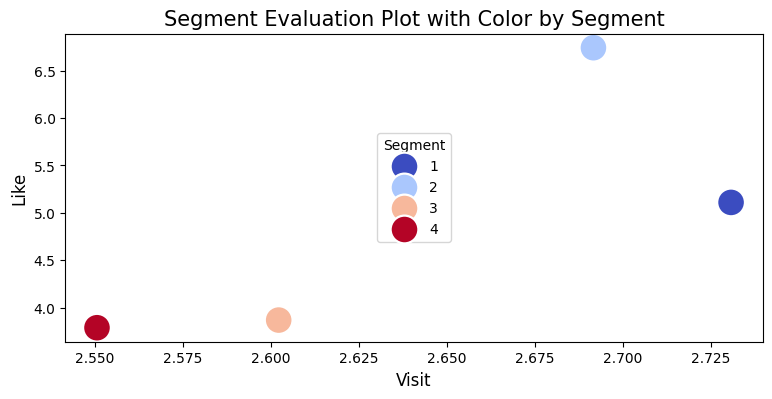

In [ ]:
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=clusters, s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Segment Evaluation Plot with Color by Segment", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.legend(title='Segment', loc='center')
plt.show()